# Анализ популярности компьютерных игр для прогнозирования продаж в интернет-магазине "Стримчик"

    Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
    
    У нас есть данные до 2016 года. Прогнозируем продажи на 2017 год.
    В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возра-
    стной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, 
    например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### Открываем файл

In [1]:
import pandas as pd
import math
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st


In [2]:
data = pd.read_csv('/Users/evgen/OneDrive/Рабочий стол/Моя новая профессия/Проекты/Анализ популярности компьютерных игр/games.csv')

In [3]:
display(data)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


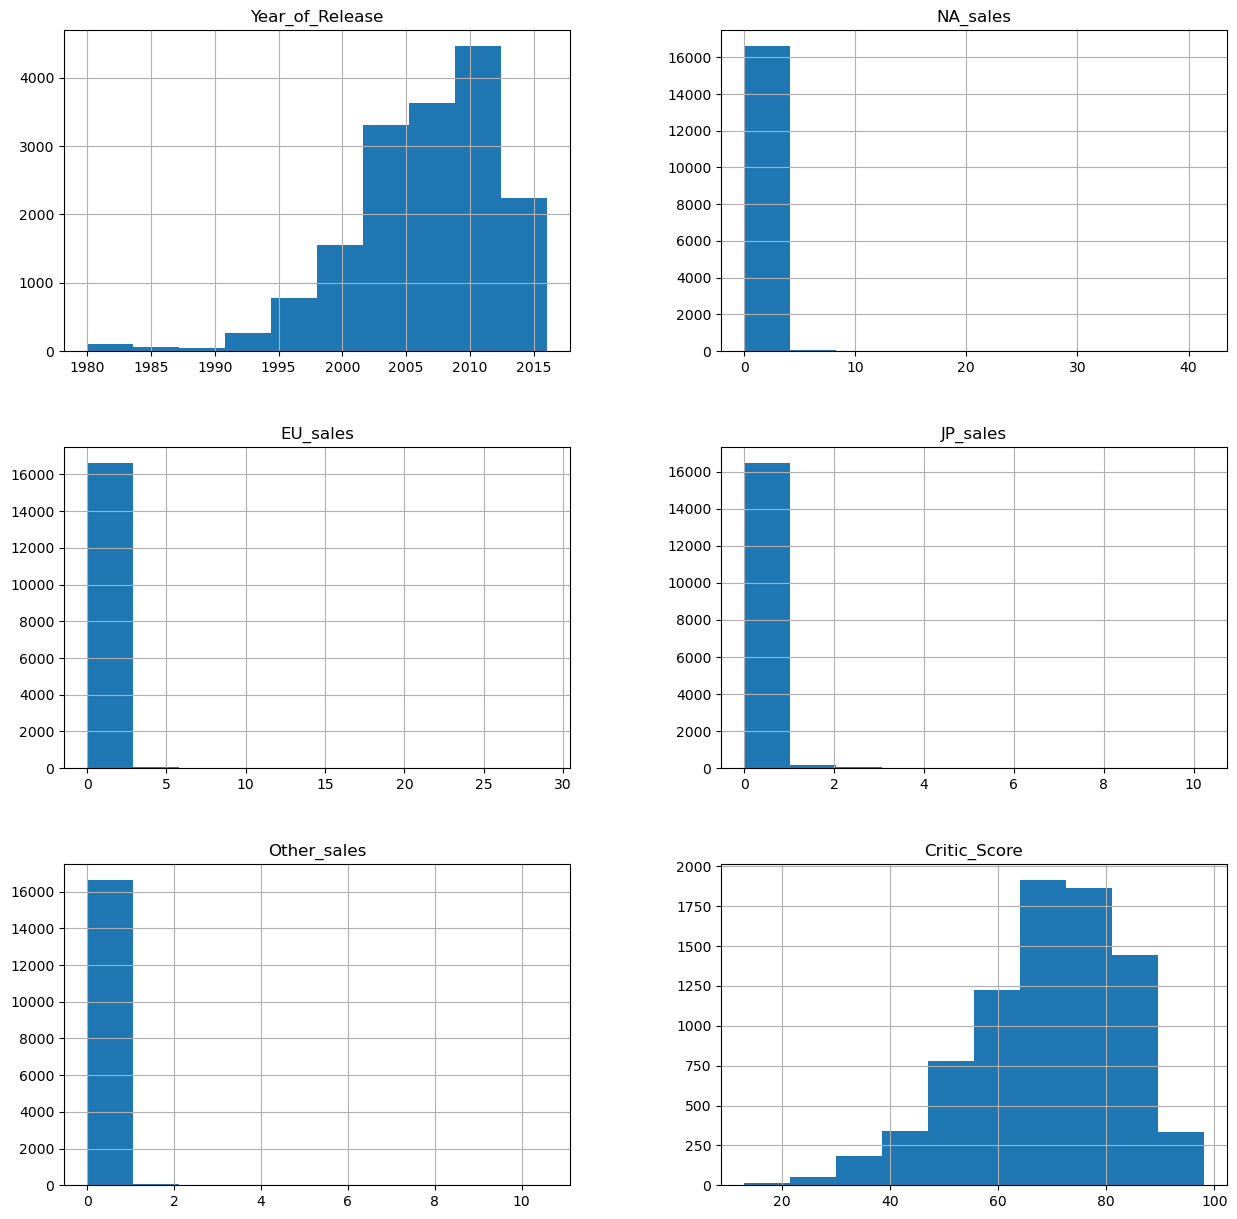

In [5]:
data.hist(figsize=(15,15));

In [6]:
data.duplicated().sum()

0

### Предобработка данных

* **Название столбцов не прописными**


* **Пропуски:**


   - Название игры
   - Год релиза
   - Жанр
   - Оценка критиков
   - Оценка пользователей
   - Рейтинг

* **Типы данных:**


- Год релиза
- Оценка пользователей


In [7]:
data = data.rename( 
 columns={ 
'Name': 'name', 
'Platform': 'platform', 
'Year_of_Release': 'year_of_release',
'Genre': 'genre',
'NA_sales': 'na_sales',
'EU_sales': 'eu_sales',
'JP_sales': 'jp_sales',
'Other_sales': 'other_sales',
'Critic_Score': 'critic_score',
'User_Score': 'user_score',
'Rating': 'rating'
 } 
)


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [9]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [10]:
data['name'].sort_values().unique().tolist()

[' Beyblade Burst',
 ' Fire Emblem Fates',
 " Frozen: Olaf's Quest",
 ' Haikyu!! Cross Team Match!',
 ' Tales of Xillia 2',
 "'98 Koshien",
 '.hack//G.U. Vol.1//Rebirth',
 '.hack//G.U. Vol.2//Reminisce',
 '.hack//G.U. Vol.2//Reminisce (jp sales)',
 '.hack//G.U. Vol.3//Redemption',
 '.hack//Infection Part 1',
 '.hack//Link',
 '.hack//Mutation Part 2',
 '.hack//Outbreak Part 3',
 '.hack//Quarantine Part 4: The Final Chapter',
 '.hack: Sekai no Mukou ni + Versus',
 '007 Racing',
 '007: Quantum of Solace',
 '007: The World is not Enough',
 '007: Tomorrow Never Dies',
 '1 vs. 100',
 '1/2 Summer +',
 '10 Minute Solution',
 '100 All-Time Favorites',
 '100 Classic Books',
 '100 Classic Games',
 '1000 Cooking Recipes from ELLE à table',
 '1001 Touch Games',
 '101-in-1 Explosive Megamix',
 '101-in-1 Party Megamix Wii',
 '101-in-1 Sports Megamix',
 '101-in-1 Sports Party Megamix',
 '1080°: TenEighty Snowboarding',
 '11eyes: CrossOver',
 '12-Sai. Honto no Kimochi',
 '12-Sai. Koisuru Diary',
 '12Ri

Так как мы не можем угадать название игры мы удаляем пропущенные названия.

In [11]:
data = data.dropna(subset=['name'])
data.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

Так как год выпуска мы тоже не можем предугадать , и средняя и  медиана здесь тоже не помогут, то данные строки мы тоже удаляем.

In [12]:
data['year_of_release'].unique()
data = data.dropna(subset=['year_of_release'])
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

In [13]:
data['year_of_release'] = data['year_of_release'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.4+ MB


In [14]:
data.loc[data['user_score'] == 'tbd', 'user_score']

119      tbd
301      tbd
520      tbd
645      tbd
718      tbd
        ... 
16695    tbd
16697    tbd
16698    tbd
16704    tbd
16706    tbd
Name: user_score, Length: 2376, dtype: object

Чтобы поменять тип данных на float в Оценке пользователей необходимо поменять строки tbd на nan

In [15]:
data['user_score'].sort_values().unique()
data.loc[data['user_score'] == 'tbd', 'user_score'] = 'nan'
data['user_score'] = data['user_score'].fillna('nan')

In [16]:
data['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'nan'], dtype=object)

In [17]:
data['user_score'] = data['user_score'].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB


In [18]:
data['rating'].sort_values().unique()
data['rating']= data['rating'].fillna('unknown')
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

Считаем общие прожади по всем регионам

In [19]:
data['all_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
data['all_sales'].head(10)

0    82.54
1    40.24
2    35.52
3    32.77
4    31.38
5    30.26
6    29.80
7    28.91
8    28.32
9    28.31
Name: all_sales, dtype: float64

### Исследовательский анализ данных

#### Смотрим, сколько игр выпускалось в разные годы

Text(0, 0.5, 'Количество игр')

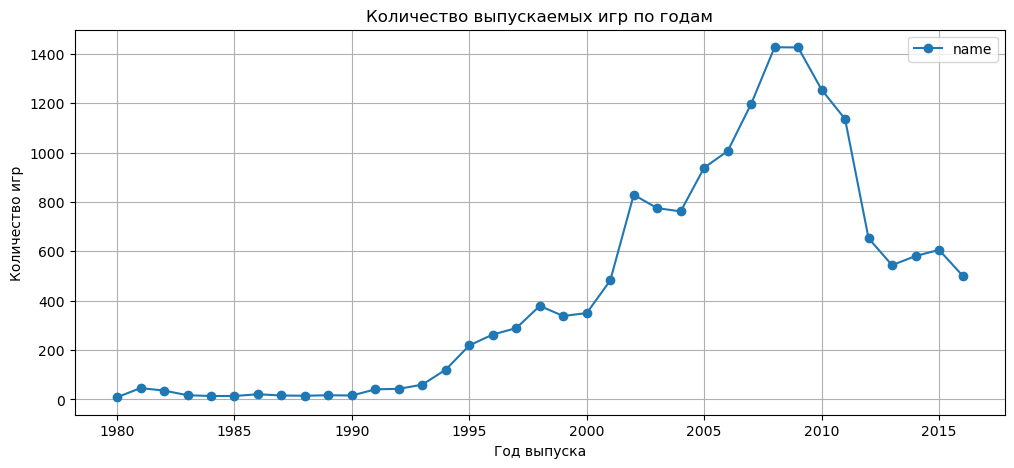

In [41]:
data.pivot_table(index='year_of_release', values='name', aggfunc='count').plot(grid=True, style='o-', figsize=(12, 5))
plt.title('Количество выпускаемых игр по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')

До 1998 года количество игр было значительно меньше. 

#### Как менялись продажи по платформам. 
Выбыраем платформы с наибольшими суммарными продажами и построим распределение по годам. 
Смотрим за какой характерный срок появляются новые и исчезают старые платформы

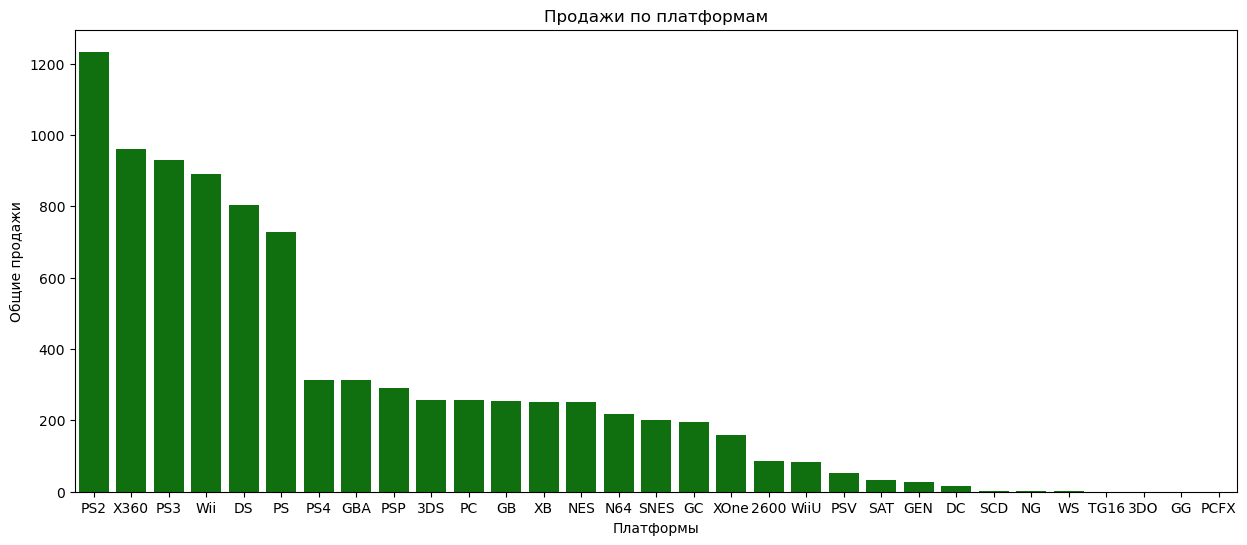

In [21]:
platform_sales_fresh = (
    data
    .pivot_table(index='platform', values='all_sales', aggfunc='sum')
    .sort_values('all_sales', ascending=False)
)
plt.figure(figsize=(15, 6))
(sns.barplot(data = platform_sales_fresh, x = platform_sales_fresh.index, y = 'all_sales', color = 'green')
    .set(title = 'Продажи по платформам', xlabel = 'Платформы', ylabel = 'Общие продажи'))
plt.show()

Посмотрим как менялись ***продажи*** по платформам из ***ТОП 5 платформ:***

In [22]:
print(platform_sales_fresh.head(5))

          all_sales
platform           
PS2         1233.56
X360         961.24
PS3          931.34
Wii          891.18
DS           802.78


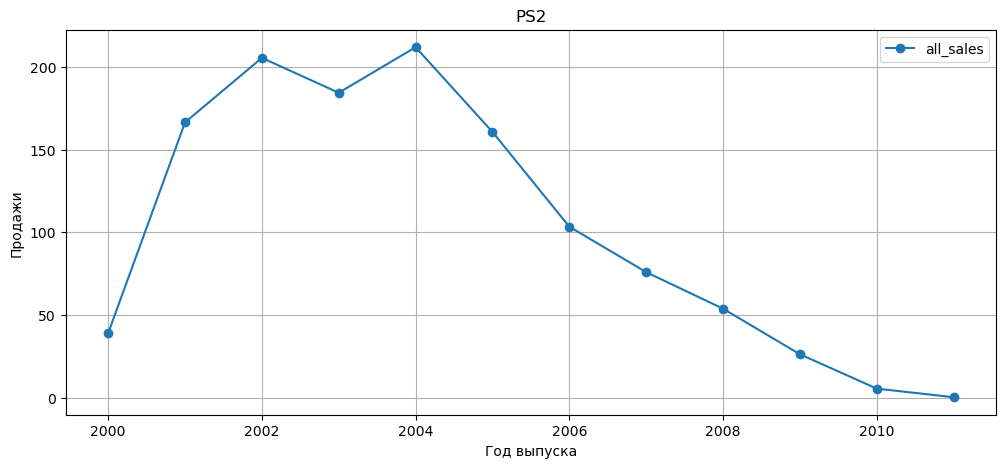

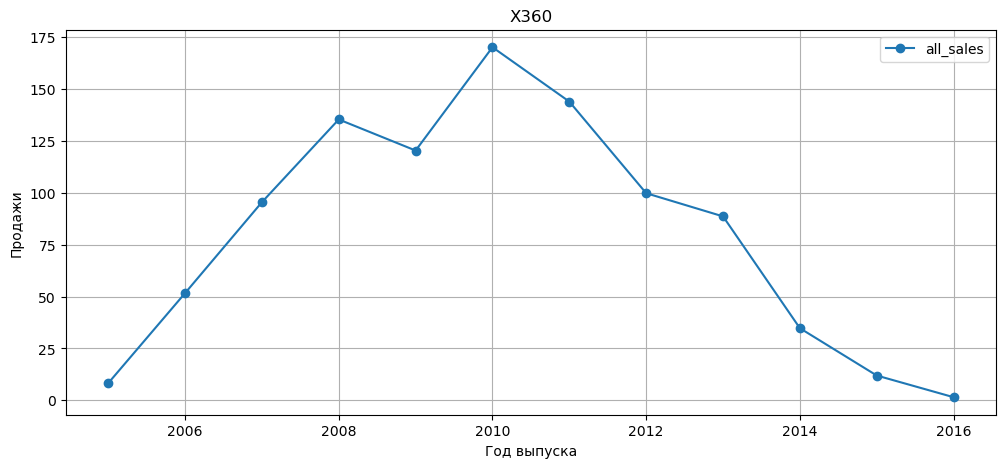

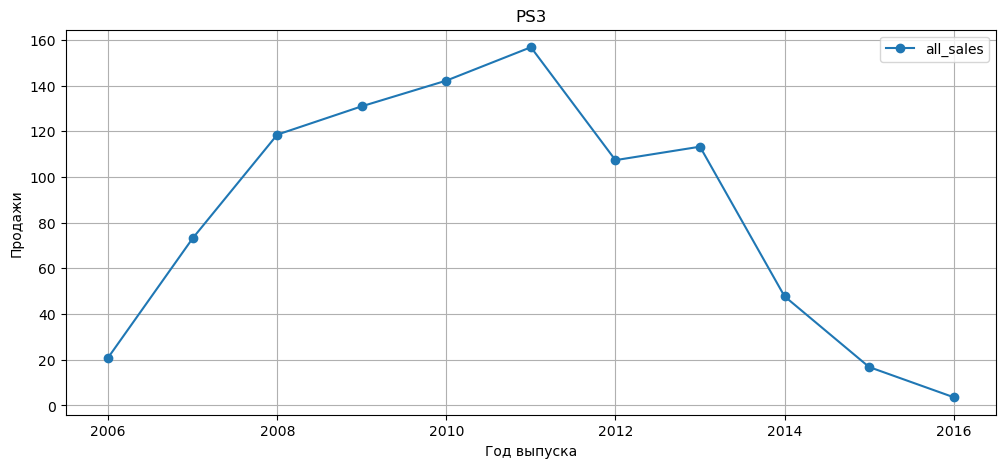

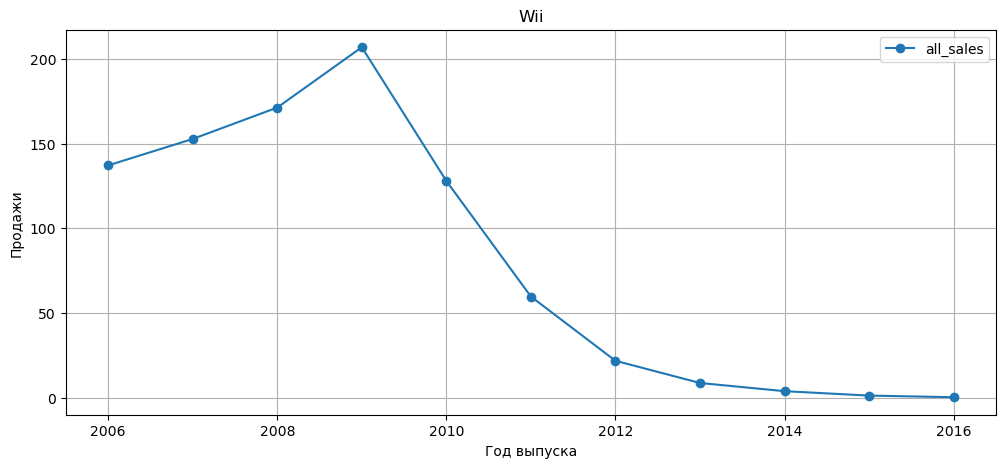

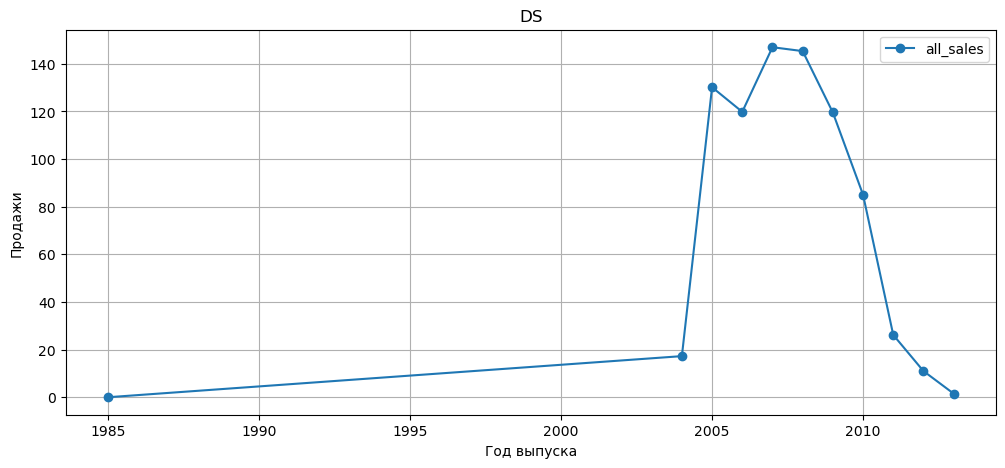

In [23]:
data.query('platform == "PS2"').pivot_table(index='year_of_release', values='all_sales', aggfunc='sum').plot(grid=True, 
                                                                                                             style='o-', 
                                                                                                             figsize=(12, 5),
                                                                                                            title='PS2')
plt.xlabel('Год выпуска')
plt.ylabel('Продажи')
plt.show()

data.query('platform == "X360"').pivot_table(index='year_of_release', values='all_sales', aggfunc='sum').plot(grid=True, 
                                                                                                             style='o-', 
                                                                                                             figsize=(12, 5),
                                                                                                            title='X360')

plt.xlabel('Год выпуска')
plt.ylabel('Продажи')
plt.show()
data.query('platform == "PS3"').pivot_table(index='year_of_release', values='all_sales', aggfunc='sum').plot(grid=True, 
                                                                                                             style='o-', 
                                                                                                             figsize=(12, 5),
                                                                                                            title='PS3')
plt.xlabel('Год выпуска')
plt.ylabel('Продажи')         
plt.show()
data.query('platform == "Wii"').pivot_table(index='year_of_release', values='all_sales', aggfunc='sum').plot(grid=True, 
                                                                                                             style='o-', 
                                                                                                             figsize=(12, 5),
                                                                                                            title='Wii')
plt.xlabel('Год выпуска')
plt.ylabel('Продажи')           
plt.show()
data.query('platform == "DS"').pivot_table(index='year_of_release', values='all_sales', aggfunc='sum').plot(grid=True, 
                                                                                                             style='o-', 
                                                                                                             figsize=(12, 5),
                                                                                                            title='DS')
plt.xlabel('Год выпуска')
plt.ylabel('Продажи')
plt.show()

Видим что в ***среднем*** платформа ***живет 10 лет***.


Платформа DS судя по графику положила начало в 1985, однако это ***НЕВЕРНО***, платформа была выпущена в 2004 году, что как раз видно на графике с 2004 по 2013 года, что также можно считать в среднем 10 лет.


А вот ***основные продажи*** приходятся в среднем ***5-6 лет***.
Исходя из этого, ***актуальным периодом*** для прогнозирования продаж на 2017 год можно взять ***период с 2013 года***. 

#### Выделяем данные за соответствующий актуальный период.

In [24]:
actual_data = data.query('year_of_release >=2013')
actual_data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,unknown,11.68
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
69,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36
72,Minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,NaN,NaN,unknown,9.18
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58


#### Выберем несколько потенциально прибыльных платформ.

In [25]:
actual_data.pivot_table(index='platform', values='all_sales', aggfunc='sum').sort_values(by='all_sales', ascending=False)

,all_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
PSV,32.99
Wii,13.66


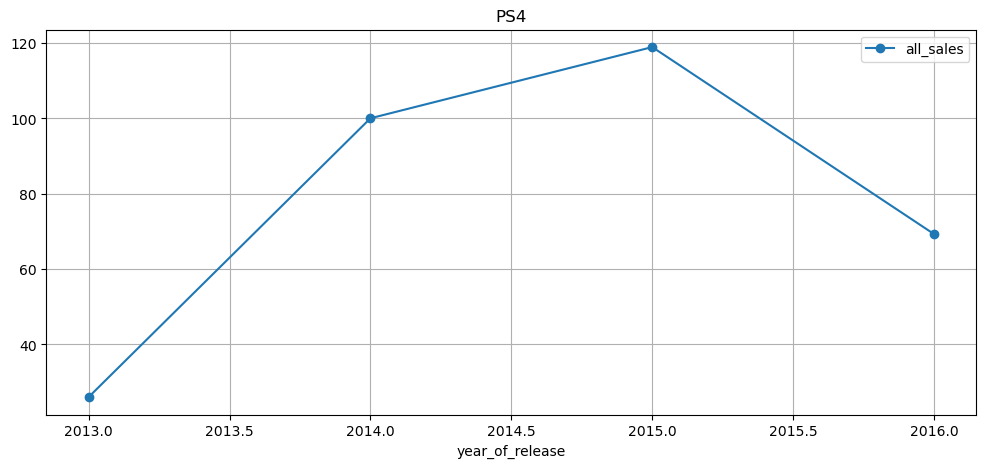

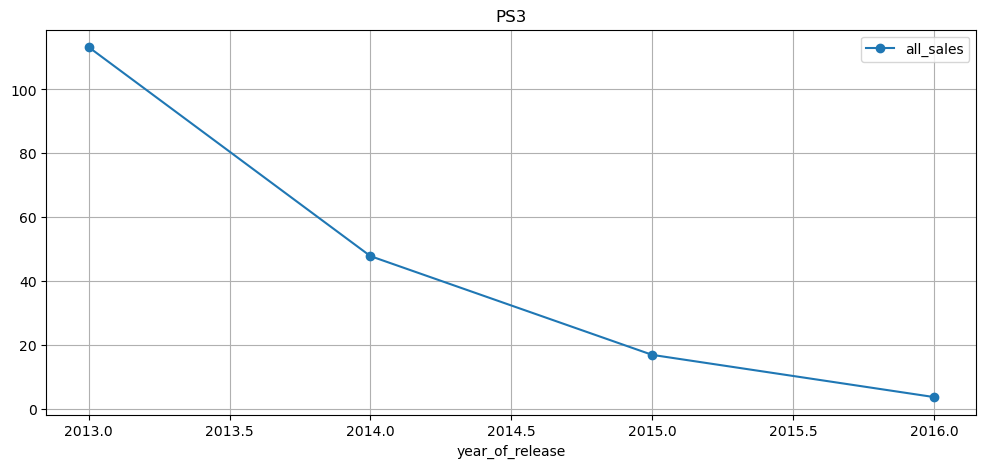

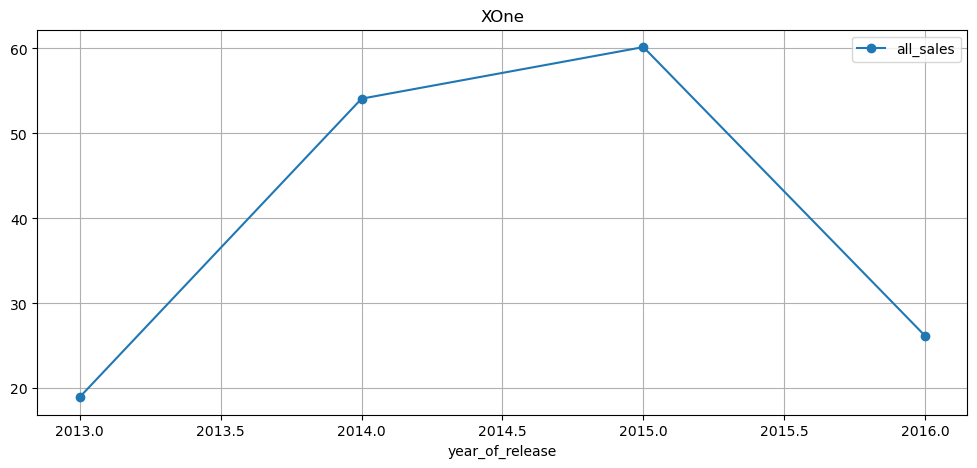

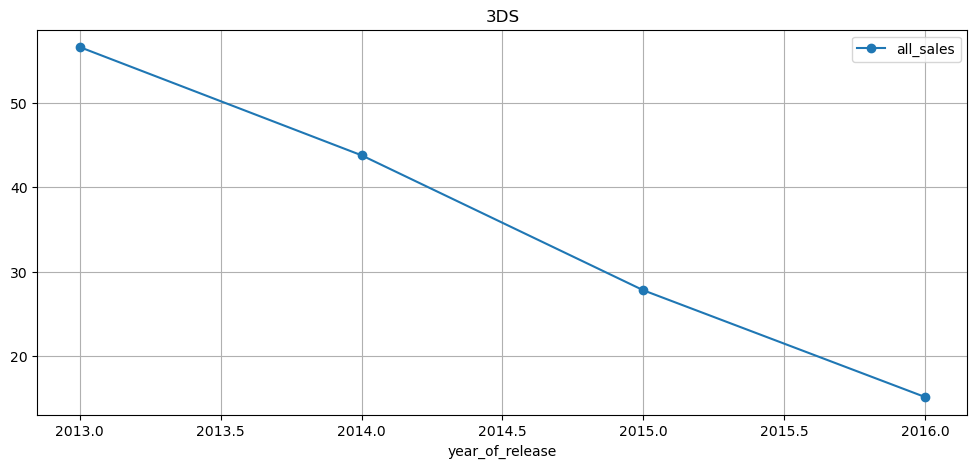

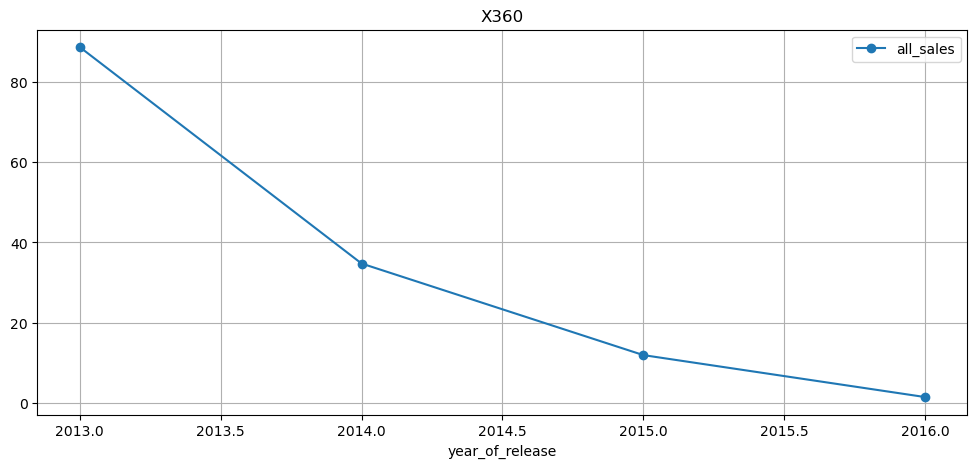

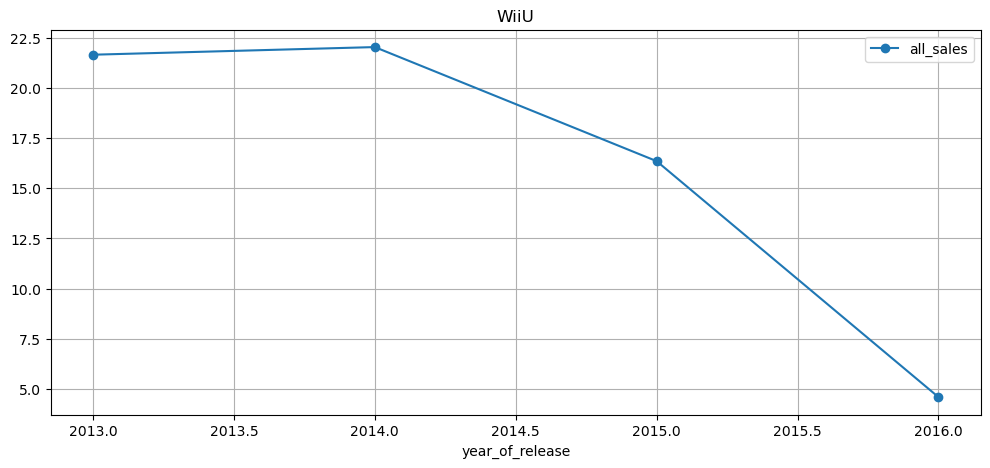

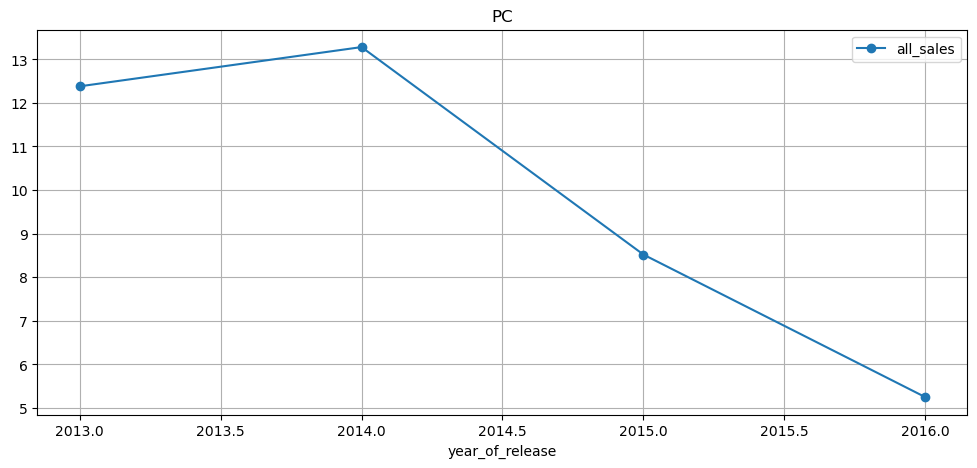

In [26]:
actual_data.query('platform == "PS4"').pivot_table(index='year_of_release', values='all_sales', aggfunc='sum').plot(grid=True, 
                                                                                                             style='o-', 
                                                                                                             figsize=(12, 5),
                                                                                                            title='PS4')
plt.show()
actual_data.query('platform == "PS3"').pivot_table(index='year_of_release', values='all_sales', aggfunc='sum').plot(grid=True, 
                                                                                                             style='o-', 
                                                                                                             figsize=(12, 5),
                                                                                                            title='PS3')
plt.show()
actual_data.query('platform == "XOne"').pivot_table(index='year_of_release', values='all_sales', aggfunc='sum').plot(grid=True, 
                                                                                                             style='o-', 
                                                                                                             figsize=(12, 5),
                                                                                                            title='XOne')
plt.show()
actual_data.query('platform == "3DS"').pivot_table(index='year_of_release', values='all_sales', aggfunc='sum').plot(grid=True, 
                                                                                                             style='o-', 
                                                                                                             figsize=(12, 5),
                                                                                                            title='3DS')
plt.show()
actual_data.query('platform == "X360"').pivot_table(index='year_of_release', values='all_sales', aggfunc='sum').plot(grid=True, 
                                                                                                             style='o-', 
                                                                                                             figsize=(12, 5),
                                                                                                            title='X360')
plt.show()
actual_data.query('platform == "WiiU"').pivot_table(index='year_of_release', values='all_sales', aggfunc='sum').plot(grid=True, 
                                                                                                             style='o-', 
                                                                                                             figsize=(12, 5),
                                                                                                            title='WiiU')
plt.show()
actual_data.query('platform == "PC"').pivot_table(index='year_of_release', values='all_sales', aggfunc='sum').plot(grid=True, 
                                                                                                             style='o-', 
                                                                                                             figsize=(12, 5),
                                                                                                            title='PC')
plt.show()

Платформа ***PS4 и XOne*** еще ***имеют актуальность***, по остальным платформам из ТОП 7 можно сказать что их актуальность заканчивается.

#### Продажи по платформам
Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

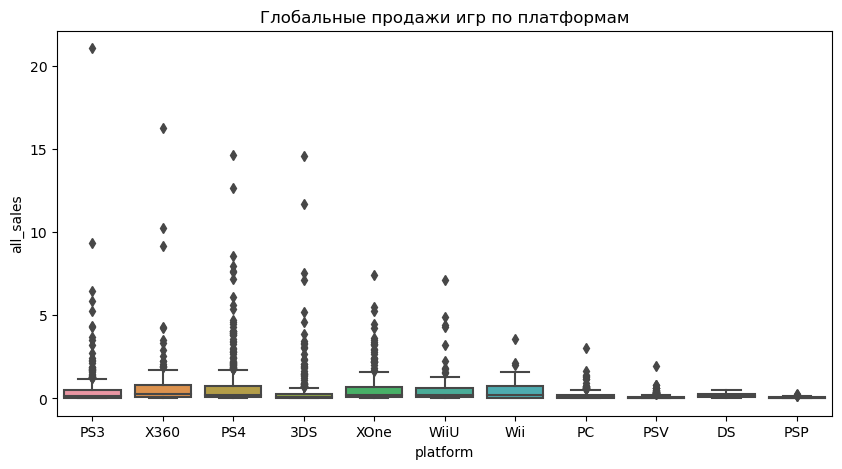

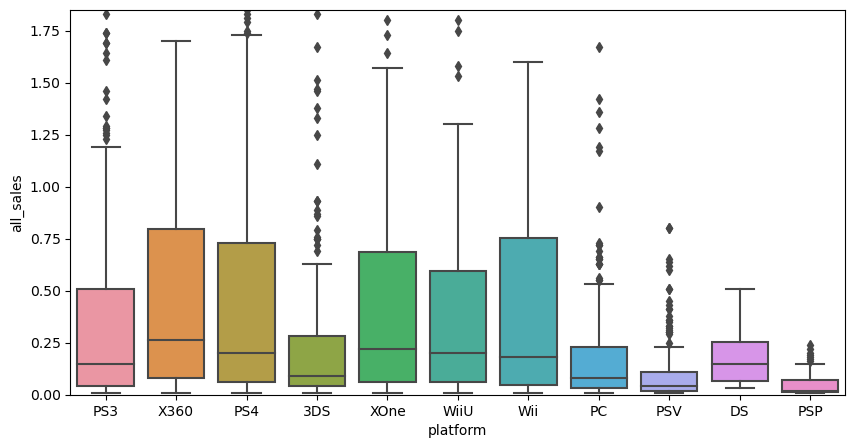

In [43]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=actual_data['platform'], y=actual_data['all_sales'])
plt.title('Глобальные продажи игр по платформам')
plt.show()
plt.figure(figsize=(10, 5))
sns.boxplot(x=actual_data['platform'], y=actual_data['all_sales'])
plt.ylim(0, 1.85);


Видим что 3DS и PC в принципе имели слабые продажи. 

А вот ***лучшие продажи*** у 
* X360: 100 - 1 700 тыс.,
* PS4:  75 - 1 750 тыс.,
* XOne: 75 - 1 600 тыс.

#### Проверка зависимости оценок на продажи
Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами.

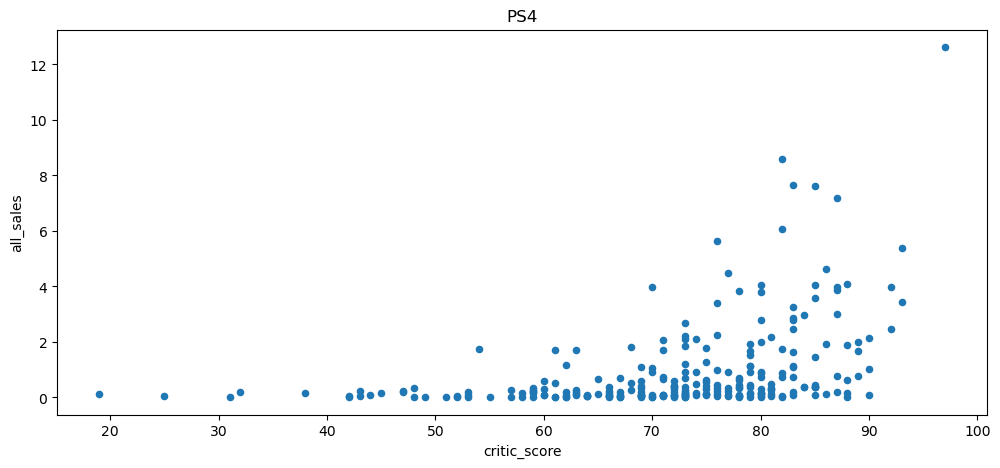

Корреляция оценки критиков 0.40656790206178095


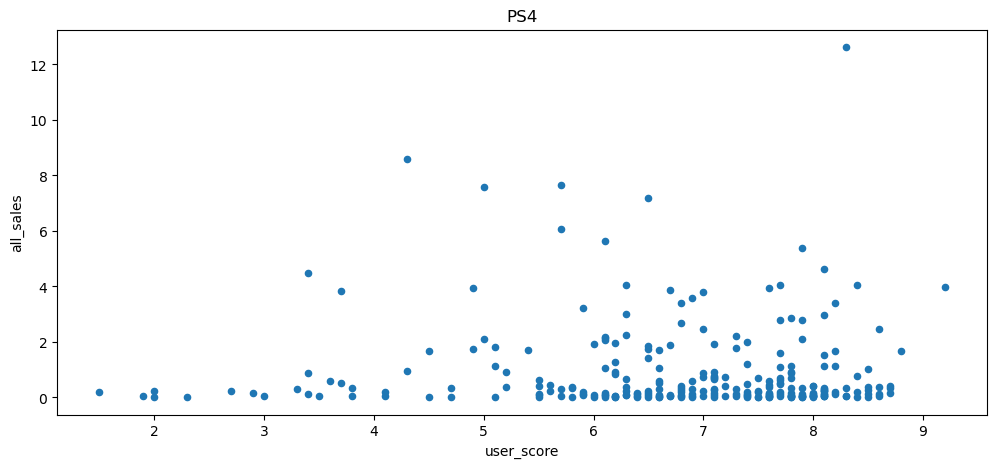

Корреляция оценки пользователей -0.031957110204556424


In [28]:
critic_score_ps4 = actual_data.query('platform == "PS4"')
critic_score_ps4.plot(x='critic_score', y='all_sales', kind='scatter', title='PS4', figsize=(12, 5))
plt.show()
print('Корреляция оценки критиков', critic_score_ps4['critic_score'].corr(critic_score_ps4['all_sales']))
user_score_ps4 = actual_data.query('platform == "PS4"')
user_score_ps4.plot(x='user_score', y='all_sales', kind='scatter', title='PS4', figsize=(12, 5))
plt.show()
print('Корреляция оценки пользователей', user_score_ps4['user_score'].corr(user_score_ps4['all_sales']))

***Оценка критиков влияет на продажи***, а вот оценка пользователей не имеет значение в продажах ***PS4***.

***Проверяем на других платформах наш вывод***

Зависимость ***оценки критиков*** на продажи:

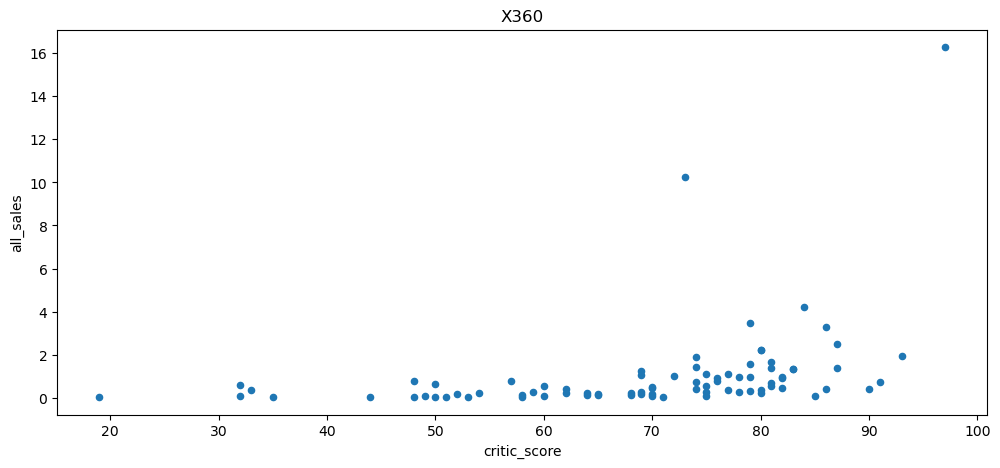

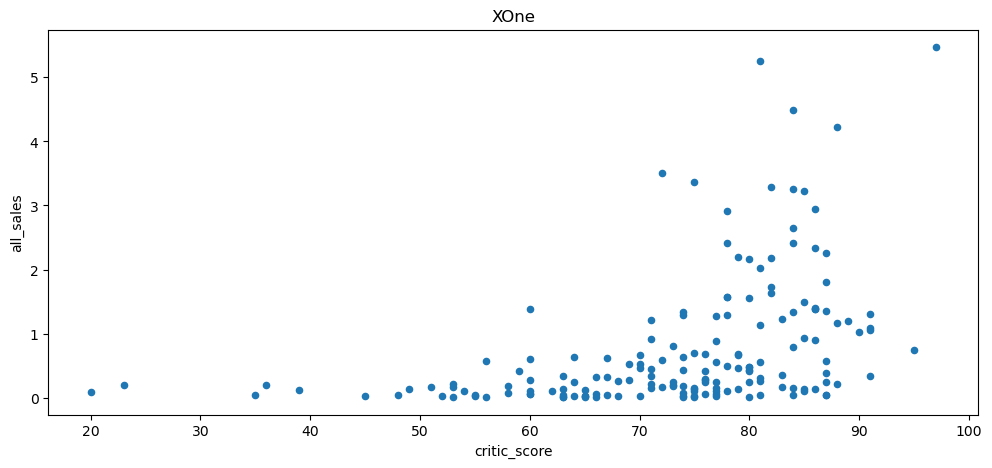

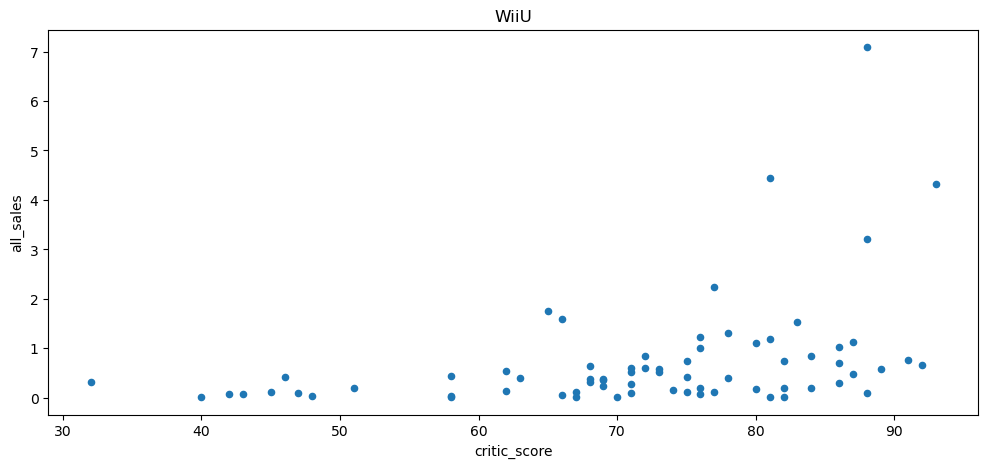

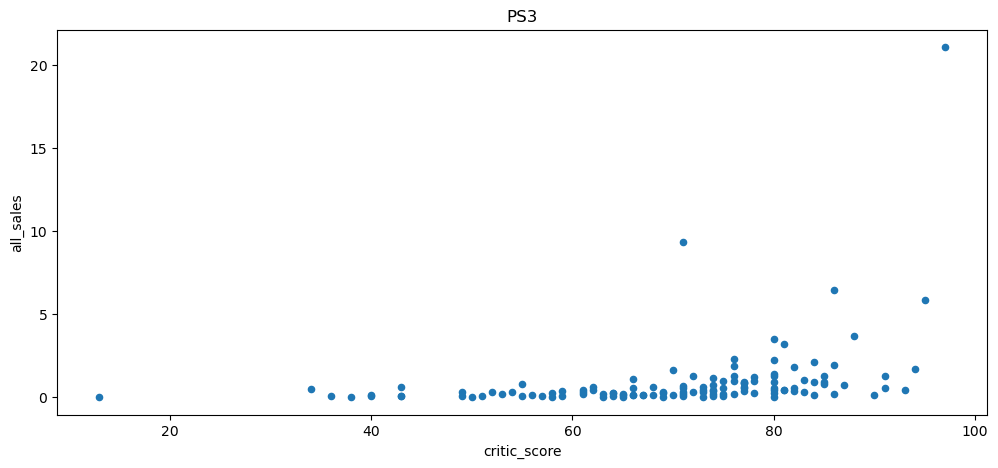

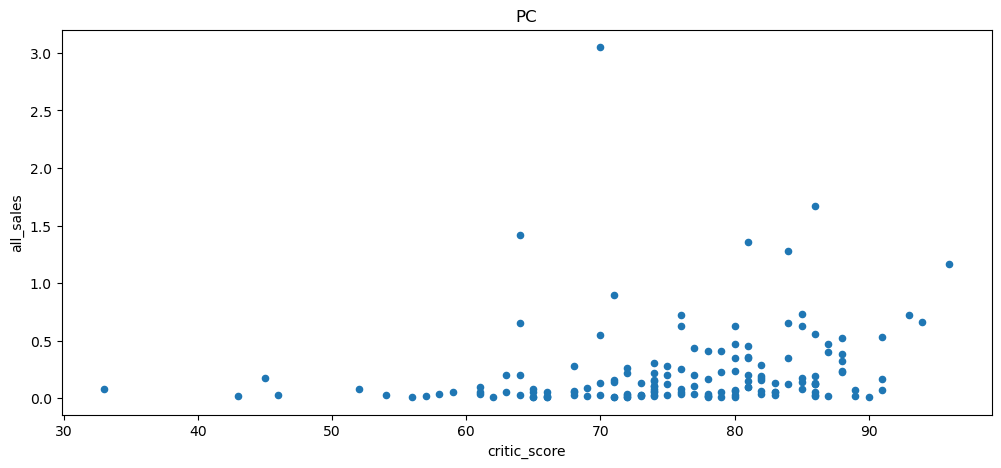

In [29]:
actual_data.query('platform == "X360"').plot(x='critic_score', y='all_sales', kind='scatter', title='X360', figsize=[12,5])
plt.show()
actual_data.query('platform == "XOne"').plot(x='critic_score', y='all_sales', kind='scatter', title='XOne', figsize=[12,5])
plt.show()
actual_data.query('platform == "WiiU"').plot(x='critic_score', y='all_sales', kind='scatter', title='WiiU', figsize=[12,5])
plt.show()
actual_data.query('platform == "PS3"').plot(x='critic_score', y='all_sales', kind='scatter', title='PS3', figsize=[12,5])
plt.show()
actual_data.query('platform == "PC"').plot(x='critic_score', y='all_sales', kind='scatter', title='PC', figsize=[12,5])
plt.show()

Влияние ***оценки пользователей*** на продажи:

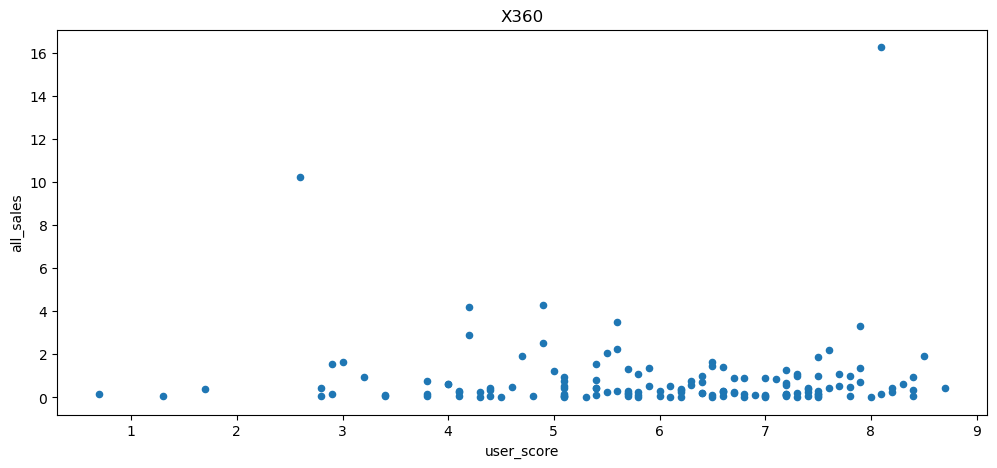

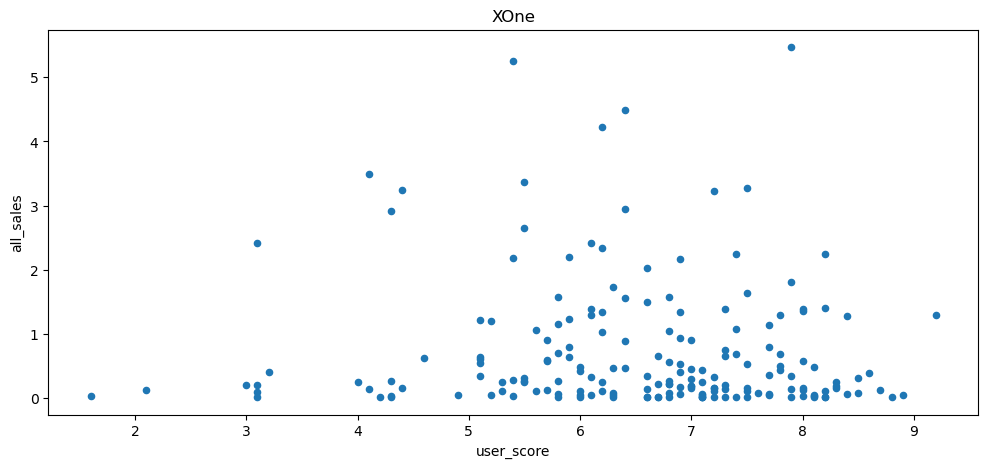

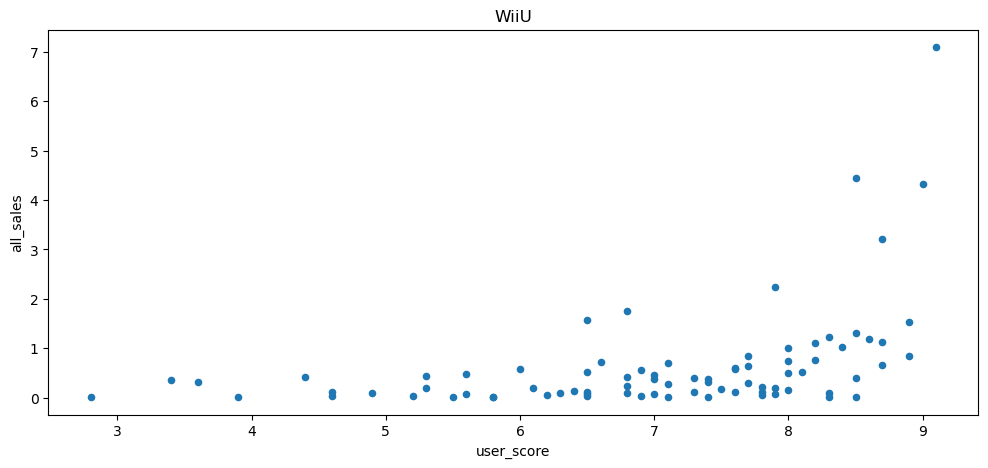

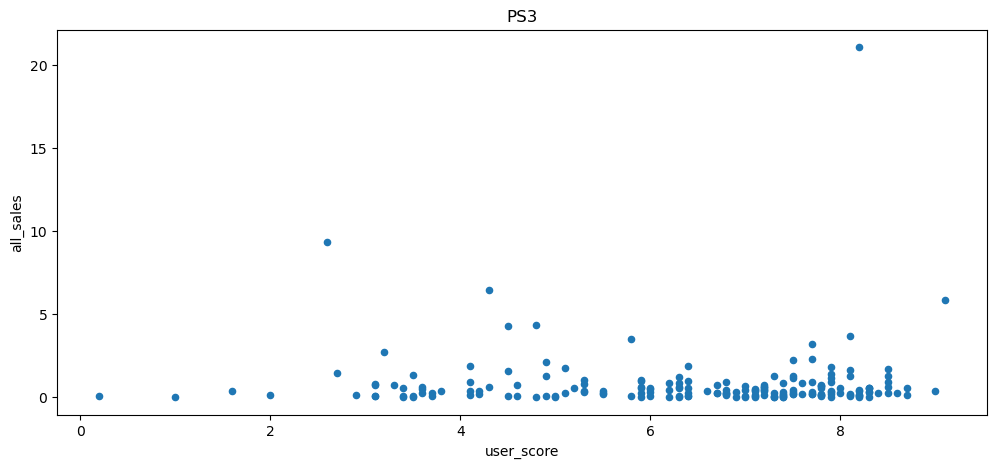

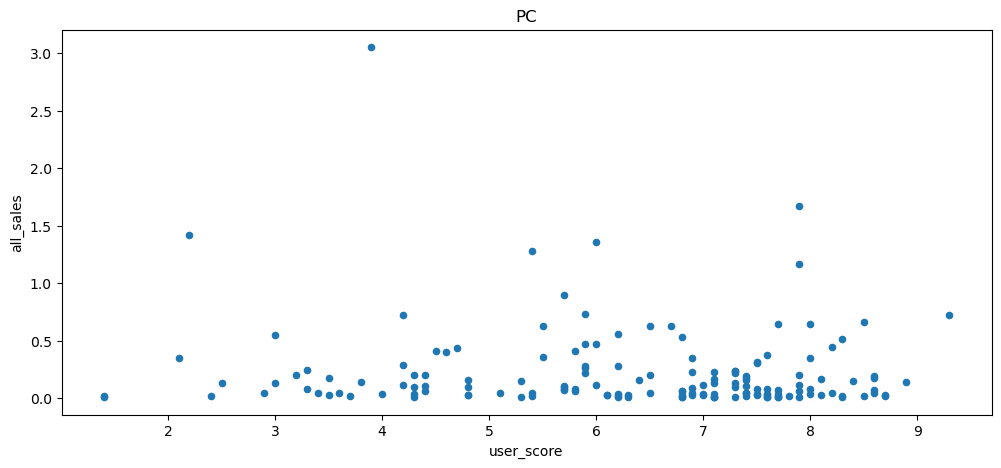

In [30]:
actual_data.query('platform == "X360"').plot(x='user_score', y='all_sales', kind='scatter', title='X360', figsize=[12,5])
plt.show()
actual_data.query('platform == "XOne"').plot(x='user_score', y='all_sales', kind='scatter', title='XOne', figsize=[12,5])
plt.show()
actual_data.query('platform == "WiiU"').plot(x='user_score', y='all_sales', kind='scatter', title='WiiU', figsize=[12,5])
plt.show()
actual_data.query('platform == "PS3"').plot(x='user_score', y='all_sales', kind='scatter', title='PS3', figsize=[12,5])
plt.show()
actual_data.query('platform == "PC"').plot(x='user_score', y='all_sales', kind='scatter', title='PC', figsize=[12,5])
plt.show()

Как видим по остальным другим платформам можно сделать аналогичный вывод.
Оценка критиков имеет значение для продаж, а вот оценка пользователей не имеет такого значения.

#### Посмотрите на общее распределение игр по жанрам
Какие самые прибыльные жанры. Выделяются ли жанры с высокими и низкими продажами?

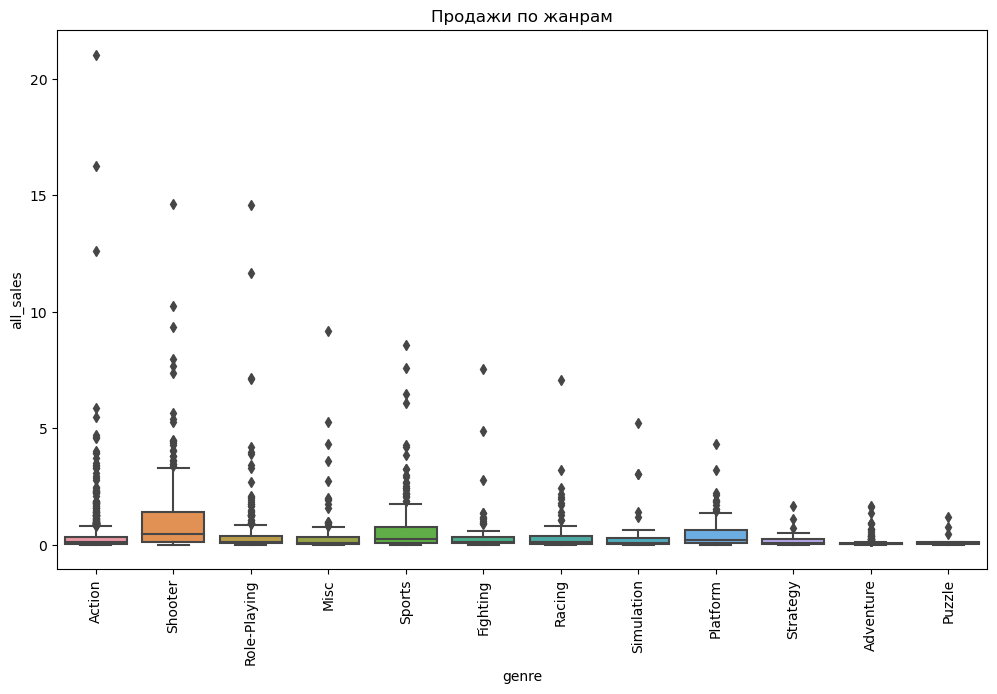

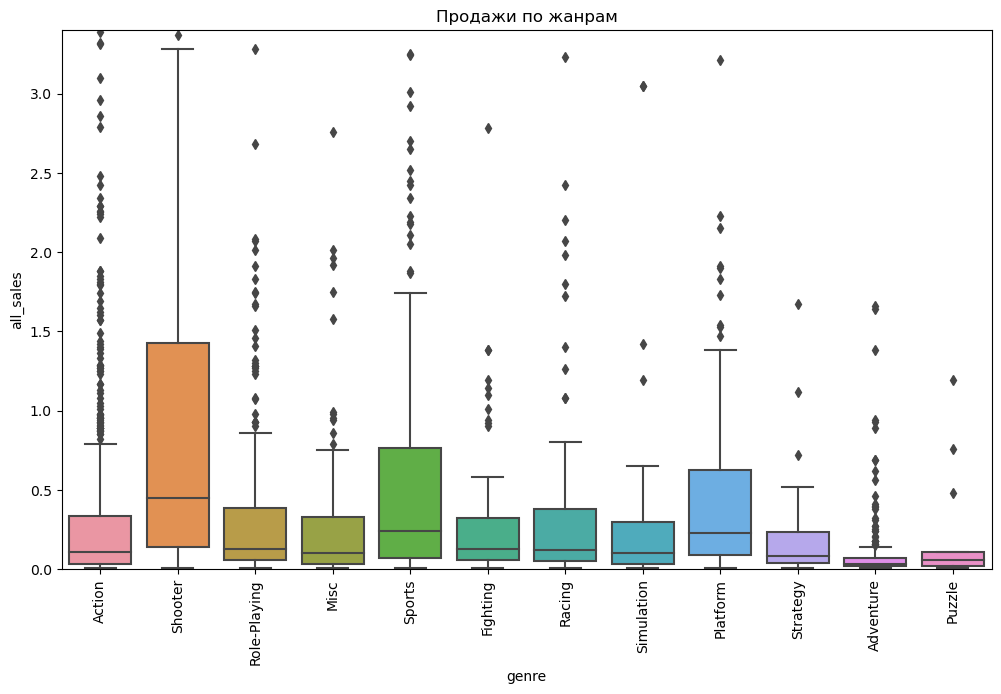

In [31]:
plt.figure(figsize=(12, 7))
sns.boxplot(x=actual_data['genre'], y=actual_data['all_sales'])
plt.xticks(rotation=90)
plt.title('Продажи по жанрам')
plt.show()

plt.figure(figsize=(12, 7))
sns.boxplot(x=actual_data['genre'], y=actual_data['all_sales'])
plt.ylim(0, 3.4)
plt.title('Продажи по жанрам')
plt.xticks(rotation=90)
plt.show()

Наиболее продаваемые жанры с выбросами:
* Экшн - 321,87 млн, 
* Шутеры - 232,98 млн, 
* Спорт - 150,65 млн,
* Ролевые - 145,89 млн

Наиболее продаваемые жанры по средним показателям:
* Шутеры, 
* Спорт, 
* Платформы,
* Гонки,
* Экшн


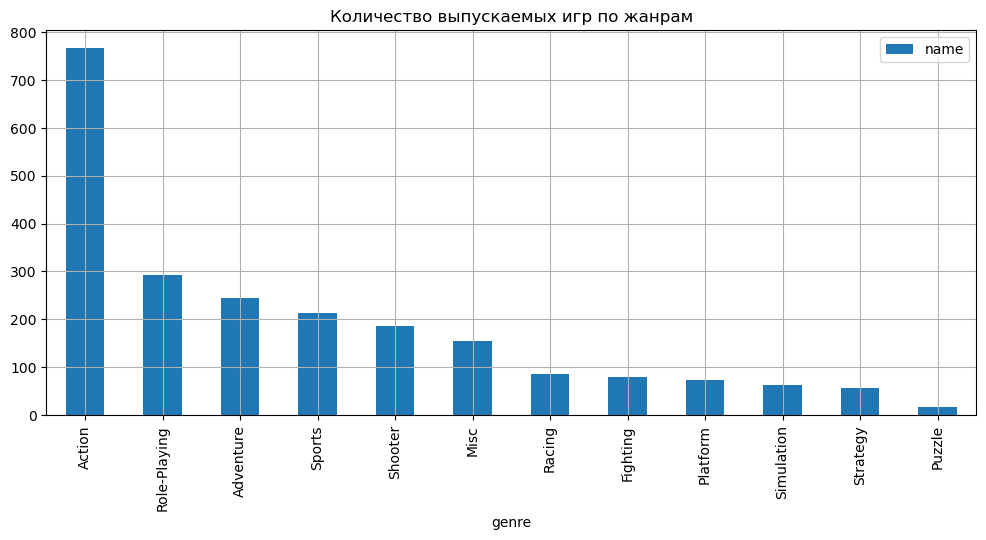

In [32]:
actual_data.pivot_table(index='genre', values='name', aggfunc='count').sort_values(by='name', ascending=False).plot(
    grid=True, kind='bar', figsize=(12, 5), title='Количество выпускаемых игр по жанрам')
plt.show()


Наибольшее разнообразие игр:
* Экшн,
* Ролевые,
* Приключение,
* Спорт, 
* Шутеры,
* Разное

А вот наименее продаваемые и выпускаемые жанры можно считать Пазлы и Приключения.

Хочется отметить что в жанре Экшн выпускаются отдельные игры которые продаются в значительной степени лучше остальных.

### Портрет пользователя каждого региона

#### Самые популярные платформы

Посмотрим и проанализируем продажи по платформам по регионам.

<Axes: title={'center': 'Продажи игр в регионах по платформам'}, xlabel='platform'>

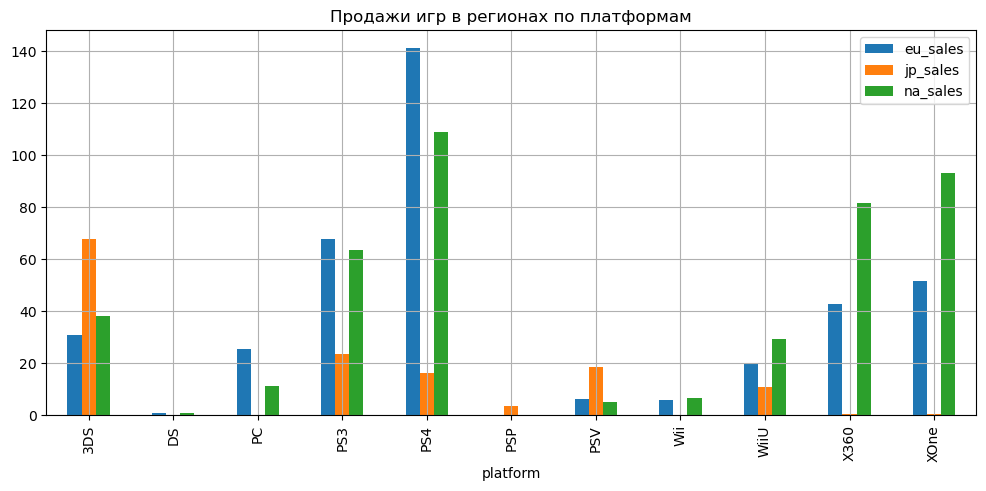

In [45]:
actual_data.pivot_table(index='platform', values=['na_sales', 'eu_sales','jp_sales'], aggfunc='sum').plot(kind='bar',
                                                                                                          grid=True, 
                                                                                                          figsize=(12, 5),
                                                                                                         title=('Продажи игр в регионах по платформам'))

Видим что в Северной Америке и Европе практически схожи. Это ТОП 5:
* PS4
* XOne
* X360
* PS3
* 3DS

А вот в Японии преобладают продажи 3DS, PS3, PSV, PS4, Wii.

#### Самые популярные жанры
Посмотрим и проанализируем продажи по жанрам по регионам.

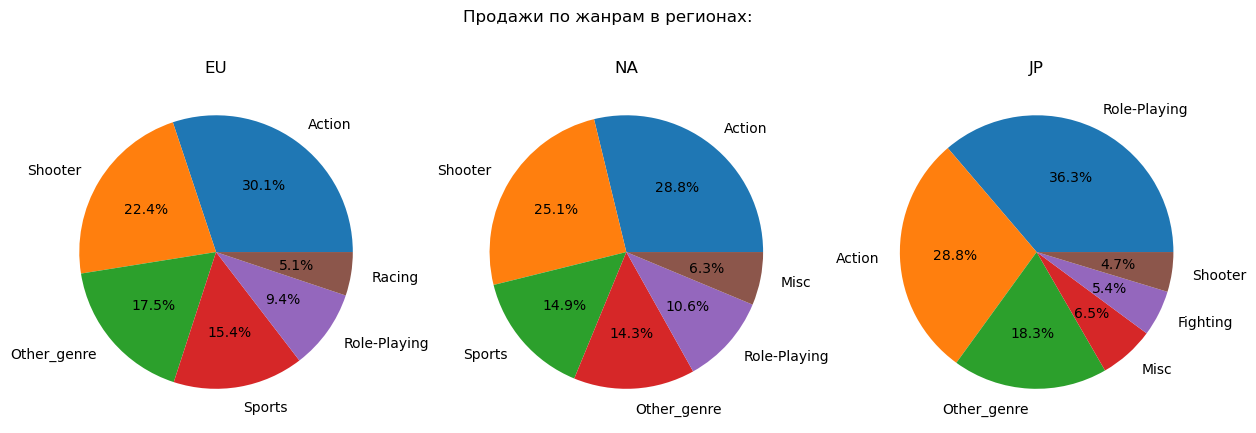

In [60]:
na = actual_data.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False
                                                                                         ).reset_index()

na.loc[len(na.index)] = ['Other_genre', na['na_sales'][5:12].sum()]
na = na.sort_values(by='na_sales', ascending=False).reset_index(drop=True)
na = na.loc[:5]

eu = actual_data.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False
                                                                                         ).reset_index()

eu.loc[len(na.index)] = ['Other_genre', eu['eu_sales'][5:12].sum()]
eu = eu.sort_values(by='eu_sales', ascending=False).reset_index(drop=True)
eu = eu.loc[:5]

jp = actual_data.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False
                                                                                         ).reset_index()

jp.loc[len(jp.index)] = ['Other_genre', jp['jp_sales'][5:12].sum()]
jp = jp.sort_values(by='jp_sales', ascending=False).reset_index(drop=True)
jp = jp.loc[:5]

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
plt.suptitle('Продажи по жанрам в регионах:')

axs[0].pie(eu['eu_sales'], labels=eu['genre'], autopct='%1.1f%%', labeldistance=1.15);
axs[0].set_title('EU')

axs[1].pie(na['na_sales'], labels=na['genre'], autopct='%1.1f%%', labeldistance=1.15);
axs[1].set_title('NA')

axs[2].pie(jp['jp_sales'], labels=jp['genre'], autopct='%1.1f%%', labeldistance=1.15);
axs[2].set_title('JP');
plt.show();

ТОП 5 жанров в Европе и Северной Америке также схожи:
* Экшн,
* Шутеры, 
* Спорт, 
* Ролевые,
* Разное

ТОП 5 Японии:
* Ролевые,
* Экшн,
* Разное,
* Боевые,
* Шутеры

#### Рейтинг ESRB по регионам
Сделаем анализ влияния данного рейтинга на продажи по регионам

In [35]:
actual_data.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'],
                                              aggfunc=({'na_sales':(lambda x:sum(x)/sum(actual_data['na_sales'])),
                                                       'eu_sales':(lambda x:sum(x)/sum(actual_data['eu_sales'])),
                                                       'jp_sales':(lambda x:sum(x)/sum(actual_data['jp_sales']))}))

,eu_sales,jp_sales,na_sales
rating,,,
E,0.212528,0.107544,0.180599
E10+,0.108839,0.041838,0.123918
M,0.370497,0.100227,0.377442
T,0.106953,0.146257,0.113751
unknown,0.201183,0.604134,0.204291


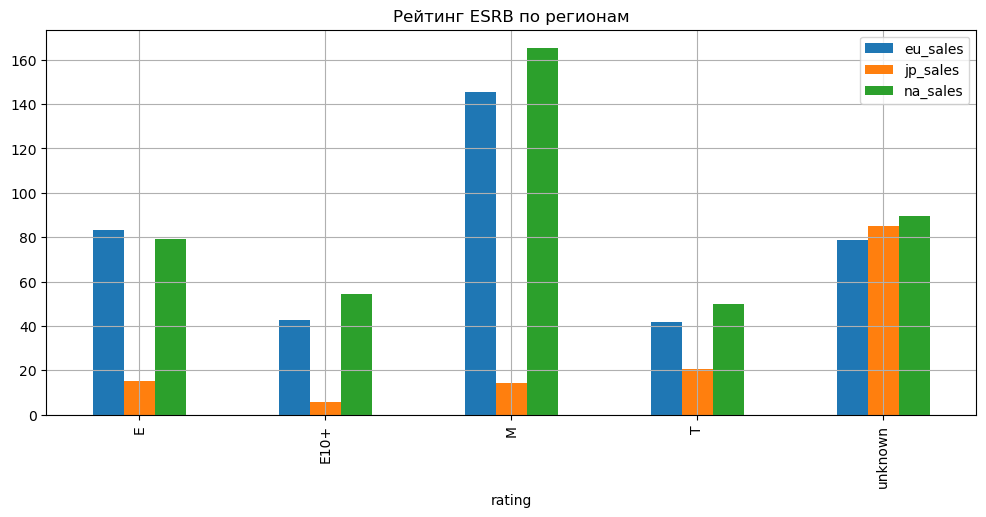

In [50]:
region_rating_sales = actual_data.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'],
                                              aggfunc=sum)
region_rating_sales.plot(kind='bar', grid=True, figsize=(12,5), title=('Рейтинг ESRB по регионам'));

Видим что данный рейтинг влияет на Северную Америку и Европу. По Японии же такой зависимости нет.


### Гипотезы


#### Проверка гипотезы: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые


```
H_0: Пользовательский рейтинг (user score) платформы Xone = пользовательский рейтинг (user score) платформы PC`
H_a: Пользовательский рейтинг (user score) платформы Xone ≠ пользовательский рейтинг (user score) платформы PC`
alpha = 0.05
```

In [37]:
xone = actual_data.query('platform == "XOne"')
xone_user = xone['user_score'].dropna()
print(xone_user)
pc = actual_data.query('platform == "PC"')
pc_user = pc['user_score'].dropna()
print(pc_user)

165      7.9
179      5.4
242      6.4
270      6.2
373      4.1
        ... 
16544    6.8
16597    6.0
16630    8.2
16643    6.6
16660    6.7
Name: user_score, Length: 182, dtype: float64
458      3.9
1095     7.9
1351     2.2
1437     6.0
1530     5.4
        ... 
16456    8.3
16463    6.8
16509    7.9
16518    1.4
16692    7.6
Name: user_score, Length: 155, dtype: float64


In [38]:
results = st.ttest_ind(xone_user, pc_user, equal_var = True)
print('p-значение: ', results.pvalue)
alpha = .05
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


#### Проверка гипотезы: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные


```
H_0: Пользовательский рейтинг (user score) жанра Action = пользовательский рейтинг (user score) жанра Sports`
H_a: Пользовательский рейтинг (user score) жанра Action ≠ пользовательский рейтинг (user score) жанра Sports`
alpha = 0.05
```


In [39]:
user_score_data = actual_data.dropna(subset=['user_score'])

action_user = user_score_data[user_score_data['genre'] == "Action"]['user_score'].array
print(action_user)
sports_user = user_score_data[user_score_data['genre'] == "Sports"]['user_score'].array
print(sports_user)

<PandasArray>
[8.2, 8.1, 8.3, 9.1, 7.9, 8.1, 8.4, 6.3, 4.9, 7.6,
 ...
 6.8, 2.3, 5.5, 7.1, 6.8, 6.0, 8.5, 5.1, 6.7, 7.6]
Length: 389, dtype: float64
<PandasArray>
[4.3, 5.0, 4.3, 5.7, 4.5, 4.2, 6.7, 4.4, 5.9, 6.3,
 ...
 3.7, 6.0, 7.1, 5.2, 6.3, 8.8, 6.9, 4.5, 1.4, 6.6]
Length: 160, dtype: float64


In [40]:
results = st.ttest_ind(action_user, sports_user, equal_var = False)
print(f'p-значение:, {results.pvalue:.3}')
alpha = .05
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:, 1.45e-20
Отвергаем нулевую гипотезу


Для проверки гипотез применяла двусторонний t-тест Стьюдента.

### Общий вывод

***ПРОДАЖИ***

Исходя из этого, ***актуальным периодом*** для прогнозирования продаж на 2017 год можно взять ***период с 2013 года***. 

***ТОП платформ за актуальный период:***

- PS4	314.14
- XOne	159.32

А вот ***лучшие продажи*** у 
* PS4:  75 - 1 750 тыс.,
* XOne: 75 - 1 600 тыс.


***ВЛИЯНИЕ ОЦЕНОК НА ПРОДАЖИ***

По ***остальным платформам*** преобладает влияние на продажи ***оценка критиков***.

***ЖАНРЫ-ЛИДЕРЫ ПРОДАЖ ***

Наиболее продаваемые жанры:
* Экшн - 321,87 млн, 
* Шутеры - 232,98 млн, 
* Спорт - 150,65 млн,
* Ролевые - 145,89 млн

Наиболее продаваемые жанры по средним показателям:
* Шутеры, 
* Спорт, 
* Платформы,
* Гонки,
* Экшн


Наибольшее разнообразие игр:
* Экшн,
* Ролевые,
* Приключение,
* Спорт, 
* Шутеры,
* Разное

***ПОРТРЕТ ПОЛЬЗОВАТЕЛЯ ПО РЕГИОНАМ***

Видим что в Северной Америке и Европе практически схожи. Это ТОП 5:
* PS4
* XOne

А вот в Японии преобладают продажи 3DS, PS3

ТОП 5 жанров в Европе и Северной Америке также схожи:
* Экшн,
* Шутеры, 
* Спорт, 
* Ролевые,
* Разное

ТОП 5 Японии:
* Ролевые,
* Экшн,
* Разное,
* Боевые,
* Шутеры


***Можно сделать ВЫВОД что самые выгодные платформы PS4 и XOne в жанре Шутеры, с положительными оценками от критиков, с рейтингом ESRB - М***